 # Installing packages

In [1]:
import math
from itertools import product
sc.uninstall_package('pip')
sc.install_pypi_package("pip==22.2.2")
sc.install_pypi_package("opencv-python") #Install opencv-python 
sc.install_pypi_package("numpy")
sc.install_pypi_package("matplotlib")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1694186863526_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Uninstalling pip-9.0.1:
  Successfully uninstalled pip-9.0.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 26.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 90.3 MB/s eta 0:00:00




[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: /tmp/1694187819133-0/bin/python -m pip install --upgrade pip


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: /tmp/1694187819133-0/bin/python -m pip install --upgrade p

# Function: latLonToTileCoord
## Description:

This function converts geographical coordinates (latitude and longitude) to tile coordinates for a given zoom level. Tile coordinates are essential in map rendering to identify which portions of the map to display.
## Parameters:

    latitude: The latitude coordinate of the location, expected to be a float value ranging from -90 to 90.
    longitude: The longitude coordinate of the location, expected to be a float value ranging from -180 to 180.
    zoom_level: The zoom level for the map, determining the resolution of the tile. Higher zoom levels correspond    
    to higher detail.

## Returns:

The function returns a tuple (x_tile, y_tile) that contains the x and y coordinates of the tile.

In [2]:

def latLonToTileCoord(latitude, longitude, zoom_level):
    '''
        Transform geographical coordinates to tile coordinates for a particular zoom level.
    '''
    lat_in_rad = math.radians(latitude)
    divisor = 2.0 ** zoom_level
    x_tile = int((longitude + 180.0) / 360.0 * divisor)
    y_tile = int((1.0 - math.asinh(math.tan(lat_in_rad)) / math.pi) / 2.0 * divisor)
    return (x_tile, y_tile)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: tileCoordToLatLon(x_coord, y_coord, zoom_level)
## Description:

This function takes tile coordinates (x_coord, y_coord) and a zoom level (zoom_level) as input arguments. It returns the corresponding geographical coordinates (latitude, longitude) based on the provided tile coordinates and zoom level.
## Parameters:

    x_coord: The x-coordinate of the tile.
    y_coord: The y-coordinate of the tile.
    zoom_level: The zoom level at which the tile exists.

## Returns:

A tuple containing the geographical coordinates (latitude, longitude).
Working Principle:

    It first calculates a divisor as 2zoom_level2zoom_level.
    The longitude is calculated using the equation x_coorddivisor×360.0−180.0divisorx_coord​×360.0−180.0.
    The latitude is calculated by:
        Taking the inverse hyperbolic sine of π×(1−2×y_coorddivisor)π×(1−divisor2×y_coord​).
        Taking the arctangent of the result to get the latitude in radians.
        Converting the latitude from radians to degrees.

In [3]:


def tileCoordToLatLon(x_coord, y_coord, zoom_level):
    '''
        Transform tile coordinates to geographical coordinates for a particular zoom level.
    '''
    divisor = 2.0 ** zoom_level
    longitude = x_coord / divisor * 360.0 - 180.0
    latitude_in_rad = math.atan(math.sinh(math.pi * (1 - 2 * y_coord / divisor)))
    latitude = math.degrees(latitude_in_rad)
    return (latitude, longitude)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: generateTileUrls(zoom_level, latitude1, longitude1, latitude2, longitude2)
## Description:

This function takes in a zoom level and two sets of geographical coordinates (latitude1, longitude1) and (latitude2, longitude2). It returns a list of URLs from which tiles can be retrieved. The list contains tiles that cover the area between the provided geographical coordinates at the given zoom level. The function also returns the dimensions of the tile grid that covers the region (number of tiles along the x and y axes).
## Parameters:

    zoom_level: The zoom level for which you want to retrieve tiles.
    latitude1, longitude1: The latitude and longitude of the first corner of the bounding box.
    latitude2, longitude2: The latitude and longitude of the second corner of the bounding box.

## Returns:

    A list of URLs for tile retrieval.
    The number of tiles in the x-direction.
    The number of tiles in the y-direction.

## Working Principle:

    Determine the minimum and maximum latitude and longitude to form a geographical bounding box.
    Convert these geographic coordinates to tile coordinates using latLonToTileCoord.
    Generate a list of tile URLs covering the area within the tile-space bounding box

In [22]:
def generateTileUrls(zoom_level, latitude1, longitude1, latitude2, longitude2):
    ''' 
        Transform geographic bounds into a list of URLs for tile retrieval at a specified zoom level.
    '''
    # Convert to geographic bounding box
    min_latitude, min_longitude = min(latitude1, latitude2), min(longitude1, longitude2)
    max_latitude, max_longitude = max(latitude1, latitude2), max(longitude1, longitude2)

    # Convert to tile-space bounding box
    x_min, y_min = latLonToTileCoord(max_latitude, min_longitude, zoom_level)
    x_max, y_max = latLonToTileCoord(min_latitude, max_longitude, zoom_level)

    # Generate a list of tile URLs
    tile_urls = []
    for x in range(x_min, x_max + 1):
        for y in range(y_min, y_max + 1):
            tile_urls.append((f"s3://elevation-tiles-prod//terrarium/{zoom_level}/{x}/{y}.png"))

    return tile_urls, (x_max - x_min) + 1, (y_max - y_min) + 1


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Import necessary libraries

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: displayImage(image_data)
## Description:

This function takes an array representing image data and displays it as a grayscale image using the Matplotlib library. It clears any existing plots before rendering the new image.
## Parameters:

    image_data: A NumPy array containing the image data. The shape and dimensions of the array should be compatible with what matplotlib.pyplot.imshow can handle. For example, it can be a 2D array for grayscale images or a 3D array for color images.

## Returns:

    No return value. The function displays the image using Matplotlib's imshow method and sets the colormap to grayscale.

## Working Principle:

    Clears the current figure using plt.clf().
    Sets the colormap to grayscale using plt.set_cmap('gray').
    Displays the image using plt.imshow()

In [6]:
def displayImage(image_data):
    plt.clf()  # Clear the current figure
    plt.set_cmap('gray')  # Set colormap to grayscale
    plt.imshow(image_data)  # Display the image


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: displayCompositeMap(tile_set, x_count, y_count)
## Description:

This function takes a set of image tiles, as well as the number of tiles in the x and y directions, and then constructs and displays a composite map using the Matplotlib library.
Parameters:

    tile_set: A list of NumPy arrays, each representing a tile. The list should be in a form that allows for concatenation into a full map.
    x_count: The number of tiles along the x-axis.
    y_count: The number of tiles along the y-axis.

## Returns:

    No return value. The function constructs and displays the composite map using Matplotlib's imshow method.

## Working Principle:

    For each row of tiles along the x-axis, the function concatenates the corresponding tiles along the y-axis. This produces a list of "tile columns."
    These tile columns are then concatenated along the x-axis to create a final composite map.
    The Matplotlib library is then used to display this composite map.

In [28]:
def displayCompositeMap(tile_set, x_count, y_count):
    
    tile_columns = [np.concatenate(tile_set[i * y_count : (i + 1) * y_count], axis=0) for i in range(x_count - 1)]
    final_map = np.concatenate(tile_columns, axis=1)
    plt.clf()  # Clear the current figure
    plt.imshow(final_map)  # Display the map



VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: calculateElevation(pixel_data)
## Description:

This function takes a NumPy array containing pixel data for a tile image and calculates the corresponding elevation levels. The pixel data is assumed to be in the format of 3 separate color channels: Red, Green, and Blue.
Parameters:

    pixel_data: A NumPy array containing the pixel data for a single image tile.

## Returns:

    A NumPy array of the same shape as pixel_data, but containing calculated elevation levels instead of color information.

## Working Principle:

    The function splits the pixel_data NumPy array into its Red, Green, and Blue channels using OpenCV's cv2.split method.
    It then calculates the elevation according to the formula: Elevation=(Red×256.0+Green+Blue256.0)−32768.0Elevation=(Red×256.0+Green+256.0Blue​)−32768.0
    Any negative elevation values are replaced with zero, as negative values are considered to be invalid.

In [8]:
def calculateElevation(pixel_data):
    (Blue, Green, Red) = cv2.split(pixel_data)
    elevation = (Red * 256.0 + Green + Blue / 256.0) - 32768.0
    elevation = np.where(elevation > 0, elevation, 0)
    return elevation


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: generateThresholds(pixel_data)
## Description:

This function takes a list of NumPy arrays representing pixel data and calculates threshold values used to divide the elevation data into different groups. The function also prints the threshold values associated with each percentage group. The pixel data is assumed to be grayscale.
## Parameters:

    pixel_data: A list of NumPy arrays containing the pixel data for multiple image tiles.

## Returns:

    A list of threshold values that will be used to divide the elevation data into different groups.

## Working Principle:

    The function parallelizes the pixel_data using Spark's RDD.
    It calculates the average value of each array using OpenCV's cv2.mean and sorts them in ascending order.
    The function calculates threshold values at specific percentages (95%, 80%, 60%, 45%, and 30%) of the sorted  mean values and prints them.
    These threshold values are then returned for further use in data processing.

In [24]:
def generateThresholds(pixel_data):
    parallel_data = spark.sparkContext.parallelize(pixel_data)
    avg_values = parallel_data.map(lambda elem: cv2.mean(elem)).sortBy(lambda elem: elem[0]).collect()

    total_count = len(avg_values)
    thresholds = []

    percentage_groups = [
        ("95% - 100%", int(95 * total_count / 100)),
        ("80% - 95%", int(80 * total_count / 100)),
        ("60% - 80%", int(60 * total_count / 100)),
        ("45% - 60%", int(45 * total_count / 100)),
        ("30% - 45%", int(30 * total_count / 100))
    ]

    for label, index in percentage_groups:
        threshold_value = avg_values[index][0]
        thresholds.append(threshold_value)
        print(f"{label}: {threshold_value}")

    return thresholds


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: applyThresholds(input_array, thresholds)
## Description:

This function applies predefined threshold values to an input NumPy array, effectively dividing the data into different groups based on these thresholds. It creates a new array where the elements are replaced with integers from 0 to 5, representing which threshold range each original value falls into.
## Parameters:

    input_array: A NumPy array that contains the data to which you want to apply the thresholds.
    thresholds: A list of numerical values used for defining threshold ranges.

## Returns:

    A NumPy array with elements replaced by integers (from 0 to 5), indicating which threshold range each original value belongs to.

## Working Principle:

    The function takes a copy of the input array.
    It then applies a series of NumPy where operations to replace the values in the array based on which threshold range they fall into:
        Values greater than or equal to thresholds[0] become 0
        Values between thresholds[0] and thresholds[1] become 1
        Values between thresholds[1] and thresholds[2] become 2
        Values between thresholds[2] and thresholds[3] become 3
        Values between thresholds[3] and thresholds[4] become 4
        Values less than thresholds[4] become 5

In [10]:
def applyThresholds(input_array, thresholds):
    output_array = input_array.copy()

    output_array = np.where(input_array >= thresholds[0], 0, output_array)
    output_array = np.where((thresholds[0] > input_array) & (input_array >= thresholds[1]), 1, output_array)
    output_array = np.where((thresholds[1] > input_array) & (input_array >= thresholds[2]), 2, output_array)
    output_array = np.where((thresholds[2] > input_array) & (input_array >= thresholds[3]), 3, output_array)
    output_array = np.where((thresholds[3] > input_array) & (input_array >= thresholds[4]), 4, output_array)
    output_array = np.where((thresholds[4] > input_array), 5, output_array)

    return output_array


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: applyColorMapping(pixel_data, thresholds)
## Description:

This function takes a set of image pixel data and a list of threshold values, applies the threshold ranges to each pixel's value, and returns a new set of data with the pixel values converted to integers representing different color mappings.
## Parameters:

    pixel_data: A set of image pixel data, usually in the form of a list of arrays.
    thresholds: A list of numerical values used for defining threshold ranges.

## Returns:

    A new set of image pixel data where each pixel value has been mapped to an integer representing a color map value.

## Working Principle:

    The function uses Spark's parallelize method to distribute the given pixel_data across multiple nodes for parallel processing.
    It applies the map transformation to each element (usually an array representing a tile or a portion of an image) in the distributed data. The mapping function used is applyThresholds, which will change each pixel's value based on the provided thresholds.
    The transformed data is then collected back into a list using Spark's collect method.

In [11]:
def applyColorMapping(pixel_data, thresholds):
    parallel_data = spark.sparkContext.parallelize(pixel_data)
    return parallel_data.map(lambda element: applyThresholds(element, thresholds)).collect()


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Import Spark libraries

In [12]:
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import col, asc

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: extractXCoordinate(filepath)
## Description:

This function takes a file path string and extracts the x-coordinate value based on the path structure. This is useful when the file paths are structured in a way that they contain spatial coordinates (e.g., tile indexes for map tiles).
## Parameters:

    filepath: A string containing the file path from which the x-coordinate will be extracted.

## Returns:

    An integer representing the extracted x-coordinate.

## Working Principle:

    The function splits the filepath string using the slash / as a delimiter.
    It then accesses the 6th index (assuming 0-based indexing) of the resulting list to obtain the x-coordinate, which is converted to an integer.
    
# Function: extractYCoordinate(filepath)

## Description:

This function takes a file path string and extracts the y-coordinate value based on the path structure. This is useful when the file paths are structured in a way that they contain spatial coordinates (e.g., tile indexes for map tiles).
## Parameters:

    filepath: A string containing the file path from which the y-coordinate will be extracted.

## Returns:

    An integer representing the extracted y-coordinate.

## Working Principle:

    The function splits the filepath string using the slash / as a delimiter.
    It then accesses the 6th index (assuming 0-based indexing) of the resulting list to obtain the y-coordinate.
    The y-coordinate part may contain the file extension, so it's further split using the dot . as a delimiter, and the first part is converted to an integer

In [13]:
def extractXCoordinate(filepath):
    result = int(filepath.split("/")[5])
    return result

def extractYCoordinate(filepath):
    result = filepath.split("/")[6]
    result = int(result.split(".")[0])
    return result


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Function: runPipeline()

## Description:

This function serves as the main driver of the elevation data processing and visualization pipeline. It orchestrates the sequence of operations required to transform tile data into a color-mapped, composite representation of elevation gradients across a given geographical area (in this case, Europe).

## Working Steps:

    Define Geographical Bounds: Set the geographical coordinates for Europe as a tuple of (max_latitude, min_longitude, min_latitude, max_longitude).

    Generate Tile URLs: Generate the URLs for map tiles that span the defined geographical area using the function generateTileUrls.

    Load Image Data: Load the image data (map tiles) from the generated URLs into a Spark DataFrame using PySpark's read.format().

    Refine Image Data: Extract the x and y tile indices from the origin column of the DataFrame and sort the rows based on these indices.

    Extract Pixel Data: Select only the data column from the DataFrame, which contains the pixel information.

    Reshape Pixel Data: Convert the PySpark DataFrame to an RDD and reshape the pixel data into NumPy arrays of shape (256, 256, 3).

    Calculate Elevation: Use the function calculateElevation to transform the pixel data to elevation data.

    Compute Gradients: Compute the x and y gradients using Sobel filters via OpenCV's cv2.Sobel() function.

    Compute Gradient Magnitude: Calculate the magnitude of the gradients from the x and y components.

    Generate Thresholds: Divide the gradient magnitude data into different groups using the function generateThresholds.

    Apply Color Mapping: Apply color mapping to the gradient magnitude based on the threshold groups using the function applyColorMapping.

    Display and Save Output: Use the function displayCompositeMap to display the final composite map. The composite map is also saved as a PNG file.

## Outputs:

    Displays the composite map showing elevation gradients with applied color mapping.
    Saves the composite map as a PNG file named color_mapped_output.png.

In [14]:
def runPipeline():
    
    EUROPE_COORDINATES = (71.185, -31.268, 34.561, 50.0)
    
    tile_data, x_span, y_span = generateTileUrls(5, *EUROPE_COORDINATES)
    
    
    image_data_df = spark.read.format("image").load(tile_data)
    refined_image_data = image_data_df.select("image.origin", "image.data")
    
    extractX = F.udf(extractXCoordinate, IntegerType())
    extractY = F.udf(extractYCoordinate, IntegerType())

    refined_image_data = refined_image_data.withColumn("x_idx", extractX("origin"))
    refined_image_data = refined_image_data.withColumn("y_idx", extractY("origin"))
    refined_image_data = refined_image_data.orderBy(col("x_idx").asc(), col("y_idx").asc())
    
    pixel_data = refined_image_data.select("data")
    
    pixel_data_rdd = pixel_data.rdd.map(lambda img: np.reshape(img, (256, 256, 3)))
    elevation_data = pixel_data_rdd.map(calculateElevation)
    
    # Gradient calculation
    gradientX = elevation_data.map(lambda img: cv2.Sobel(img, cv2.CV_64F, 1, 0))
    gradientY = elevation_data.map(lambda img: cv2.Sobel(img, cv2.CV_64F, 0, 1))

    grad_x = np.asarray(gradientX.take(gradientX.count()))
    grad_y = np.asarray(gradientY.take(gradientY.count()))

    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    threshold_groups = generateThresholds(gradient_magnitude)
  
    color_mapped = applyColorMapping(gradient_magnitude, threshold_groups)
    
    color_mapped = cv2.bitwise_not(color_mapped)

    displayCompositeMap(color_mapped, x_span, y_span)
    plt.imsave('color_mapped_output.png', color_mapped)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Running pipeline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

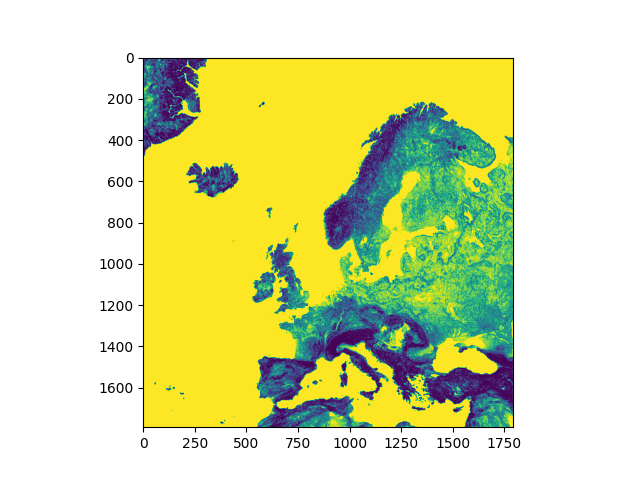

In [29]:
runPipeline()
%matplot plt